# 마스크 착용유무 인식

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('models/mask_detector.model')

cap = cv2.VideoCapture(0)
ret, img = cap.read()

#fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
#out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (img.shape[1], img.shape[0]))

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    h, w = img.shape[:2]

    blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
    facenet.setInput(blob)
    dets = facenet.forward()

    result_img = img.copy()

    for i in range(dets.shape[2]):
        confidence = dets[0, 0, i, 2]
        if confidence < 0.5:
            continue

        x1 = int(dets[0, 0, i, 3] * w)
        y1 = int(dets[0, 0, i, 4] * h)
        x2 = int(dets[0, 0, i, 5] * w)
        y2 = int(dets[0, 0, i, 6] * h)
        
        face = img[y1:y2, x1:x2]

        face_input = cv2.resize(face, dsize=(224, 224))
        face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
        face_input = preprocess_input(face_input)
        face_input = np.expand_dims(face_input, axis=0)
        
        mask, nomask = model.predict(face_input).squeeze()

        if mask > nomask:
            color = (0, 255, 0)
            label = 'Mask %d%%' % (mask * 100)
        else:
            color = (0, 0, 255)
            label = 'No Mask %d%%' % (nomask * 100)

        cv2.rectangle(result_img, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=color, lineType=cv2.LINE_AA)
        cv2.putText(result_img, text=label, org=(x1, y1 - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=color, thickness=2, lineType=cv2.LINE_AA)

    #out.write(result_img)
    cv2.imshow('result', result_img)
    #if cv2.waitKey(1) == ord('q'):
        #break
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press 'ESC' to quit # ESC를 누르면 종료
        break

#out.release()
cap.release()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
from PIL import Image
Mask = Image.open("Image\s1.png")
No_Mask = Image.open("Image\s2.png")
Half_Mask = Image.open("Image\s3.png")

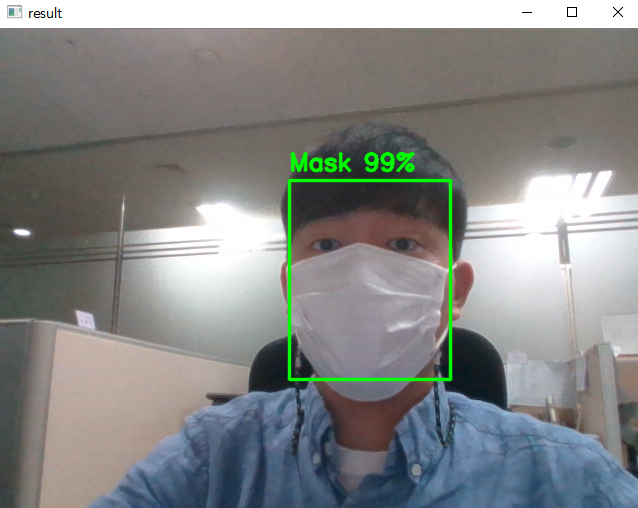

In [4]:
Mask

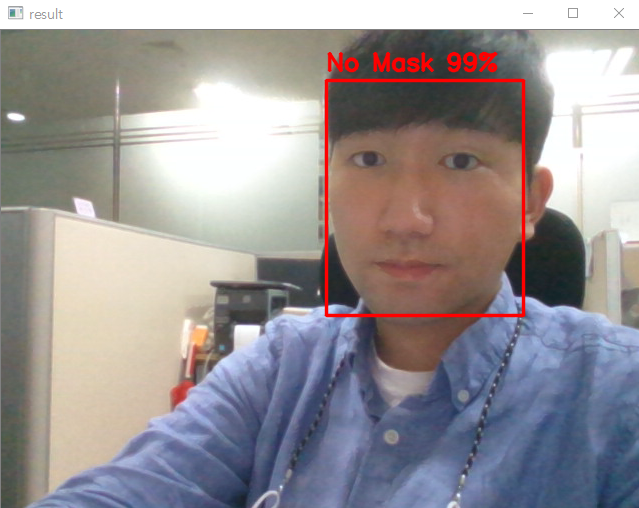

In [5]:
No_Mask

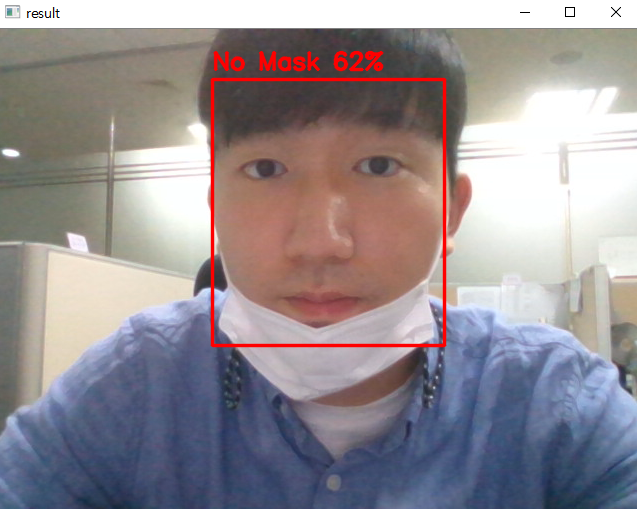

In [6]:
Half_Mask